# **PHÂN TÍCH KHÁM PHÁ DỮ LIỆU PHÂN LOẠI CHẤT LƯỢNG RƯỢU VANG ĐỎ**

**Thực hiện thống kê mô tả trên tập dữ liệu về phân loại chất lượng rượu đỏ**  
Dữ liệu lấy tại https://www.kaggle.com/code/eisgandar/red-wine-qauality-eda-classification

## **Import thư viện**

In [5]:
# Import thư viện
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho biểu đồ
plt.style.use('default')
sns.set_palette("husl")

## **Đọc dữ liệu winequality_red.csv**

In [6]:
# Đọc dữ liệu wine quality
wine_data = pd.read_csv('data/winequality_red.csv')
print("Kích thước dữ liệu:", wine_data.shape)
print("\nThông tin dữ liệu:")
wine_data.info()

Kích thước dữ liệu: (1599, 12)

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Phân tích các cột quan trọng**

### **Tính correlation để xác định các cột quan trọng**  

**Mục tiêu**:  
1. Tính correlation (hệ số tương quan) giữa tất cả các thuộc tính với cột `quality` (chất lượng rượu vang)
2. Sắp xếp các thuộc tính theo mức độ tương quan từ cao đến thấp
3. In ra bảng correlation để xem thuộc tính nào có ảnh hưởng mạnh nhất đến chất lượng  

**Ý nghĩa**:  
1. Correlation gần +1 = ảnh hưởng tích cực mạnh (thuộc tính tăng → chất lượng tăng)  
2. Correlation gần -1 = ảnh hưởng tiêu cực mạnh (thuộc tính tăng → chất lượng giảm)  
3. Correlation gần 0 = ít ảnh hưởng hoặc không ảnh hưởng  

In [7]:
# Tính correlation giữa các thuộc tính và quality
correlation_with_quality = wine_data.corr()['quality'].sort_values(ascending=False)

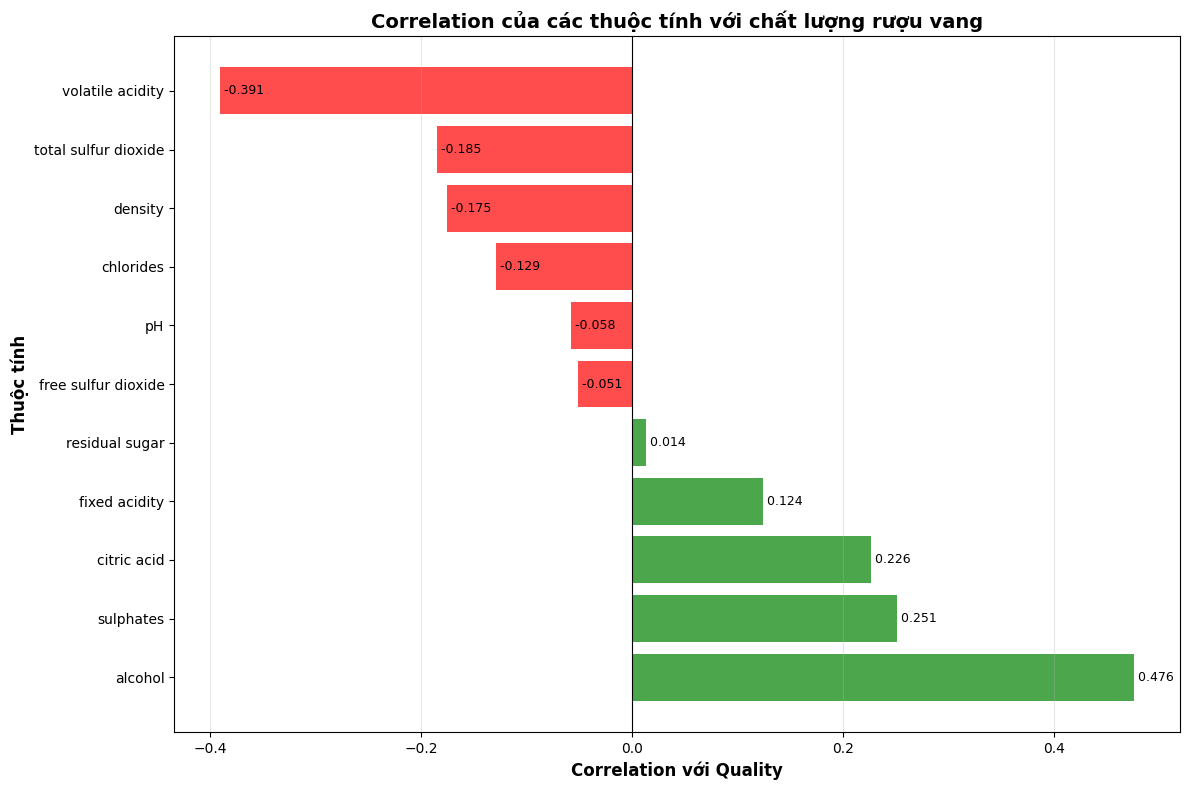

In [8]:
# 1. Biểu đồ cột ngang (Bar chart) - Correlation của tất cả thuộc tính
plt.figure(figsize=(12, 8))

# Loại bỏ quality khỏi danh sách để vẽ
corr_plot = correlation_with_quality[correlation_with_quality.index != 'quality']

# Tạo màu sắc: xanh cho tích cực, đỏ cho tiêu cực
colors = ['green' if x > 0 else 'red' for x in corr_plot.values]

# Vẽ biểu đồ ngang
plt.barh(corr_plot.index, corr_plot.values, color=colors, alpha=0.7)
plt.xlabel('Correlation với Quality', fontsize=12, fontweight='bold')
plt.ylabel('Thuộc tính', fontsize=12, fontweight='bold')
plt.title('Correlation của các thuộc tính với chất lượng rượu vang', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

# Thêm giá trị correlation vào biểu đồ
for i, (idx, val) in enumerate(corr_plot.items()):
    plt.text(val, i, f' {val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

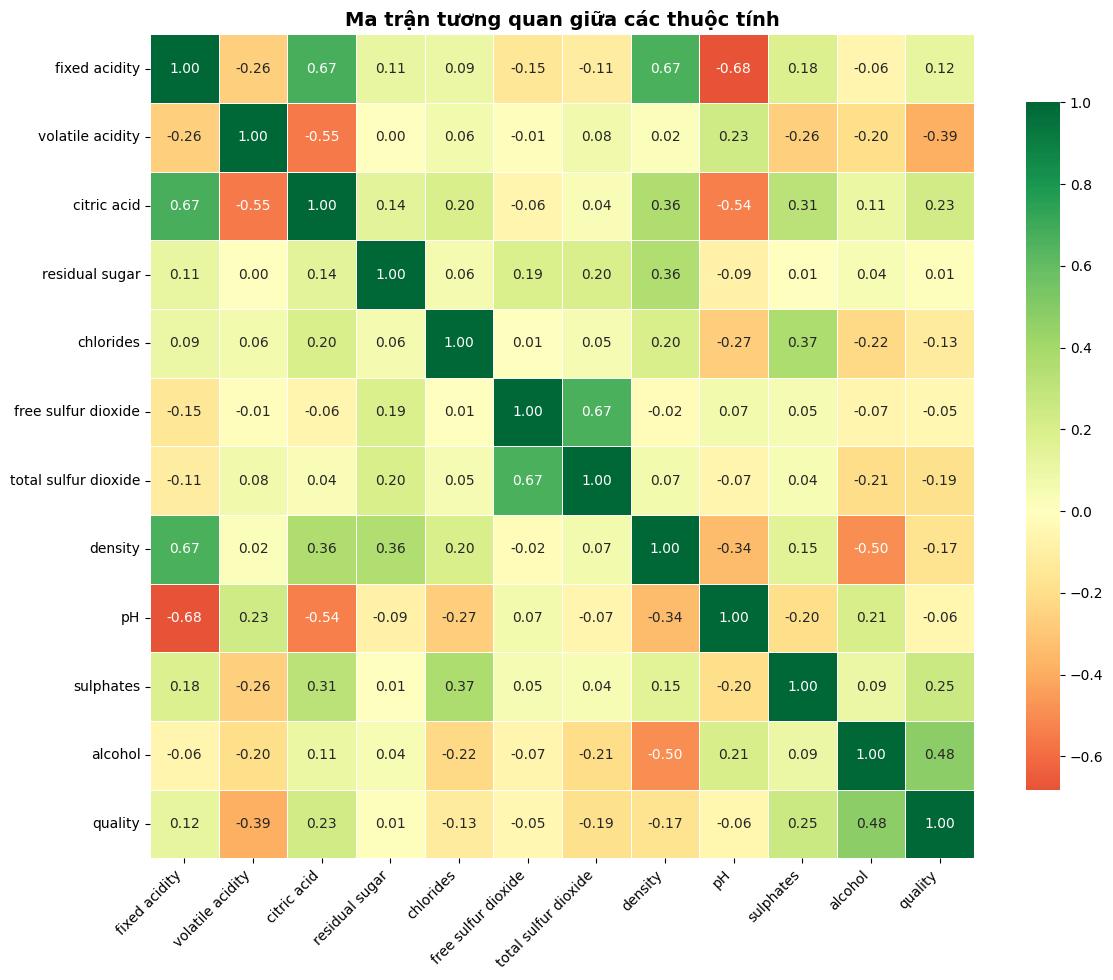

In [9]:
# 2. Heatmap - Ma trận tương quan của tất cả các thuộc tính
plt.figure(figsize=(12, 10))

# Tính ma trận correlation cho tất cả các cột
correlation_matrix = wine_data.corr()

# Vẽ heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Hiển thị giá trị
            fmt='.2f',   # Định dạng 2 chữ số thập phân
            cmap='RdYlGn',  # Màu: đỏ (âm) -> vàng (0) -> xanh (dương)
            center=0,    # Tâm màu tại 0
            square=True, # Ô vuông
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Ma trận tương quan giữa các thuộc tính', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Kết luận:**

Sau khi tính toán và trực quan hóa correlation, ta rút ra được những nhận định quan trọng sau:

1. **Thuộc tính ảnh hưởng tích cực nhất:** `alcohol` (0.476)
   - Nồng độ cồn có tương quan dương mạnh nhất với chất lượng rượu vang
   - Khi nồng độ cồn tăng, chất lượng rượu vang có xu hướng tăng theo

2. **Thuộc tính ảnh hưởng tiêu cực nhất:** `volatile acidity` (-0.391)
   - Độ acid bay hơi có tương quan âm mạnh với chất lượng
   - Khi độ acid bay hơi tăng (rượu có mùi giấm), chất lượng giảm đáng kể

3. **Các thuộc tính có ảnh hưởng trung bình:**
   - `sulphates` (0.251), `citric acid` (0.226): ảnh hưởng tích cực vừa phải
   - `total sulfur dioxide` (-0.185), `density` (-0.175): ảnh hưởng tiêu cực vừa phải

4. **Các thuộc tính ít ảnh hưởng:**
   - `residual sugar`, `free sulfur dioxide`, `pH` có correlation gần 0
   - Những thuộc tính này không đóng vai trò quyết định đến chất lượng rượu vang

**→ Kết luận:** Để cải thiện chất lượng rượu vang, cần tập trung vào việc tăng nồng độ cồn và giảm độ acid bay hơi.

### **Lọc các cột quan trọng**

In [10]:
# Lọc các cột có correlation > 0.1 hoặc < -0.1
important_features = correlation_with_quality[abs(correlation_with_quality) > 0.1]
important_features = important_features[important_features.index != 'quality']

print("=" * 70)
print("CÁC CỘT QUAN TRỌNG NHẤT (|correlation| > 0.1):")
print("=" * 70)
for col, corr in important_features.items():
    impact = "✓ Tích cực (càng cao càng tốt)" if corr > 0 else "✗ Tiêu cực (càng cao càng xấu)"
    print(f"{col:30s}: {corr:7.4f} - {impact}")

print(f"\n→ Có {len(important_features)} cột quan trọng trong tổng số {len(wine_data.columns)-1} cột")

CÁC CỘT QUAN TRỌNG NHẤT (|correlation| > 0.1):
alcohol                       :  0.4762 - ✓ Tích cực (càng cao càng tốt)
sulphates                     :  0.2514 - ✓ Tích cực (càng cao càng tốt)
citric acid                   :  0.2264 - ✓ Tích cực (càng cao càng tốt)
fixed acidity                 :  0.1241 - ✓ Tích cực (càng cao càng tốt)
chlorides                     : -0.1289 - ✗ Tiêu cực (càng cao càng xấu)
density                       : -0.1749 - ✗ Tiêu cực (càng cao càng xấu)
total sulfur dioxide          : -0.1851 - ✗ Tiêu cực (càng cao càng xấu)
volatile acidity              : -0.3906 - ✗ Tiêu cực (càng cao càng xấu)

→ Có 8 cột quan trọng trong tổng số 11 cột


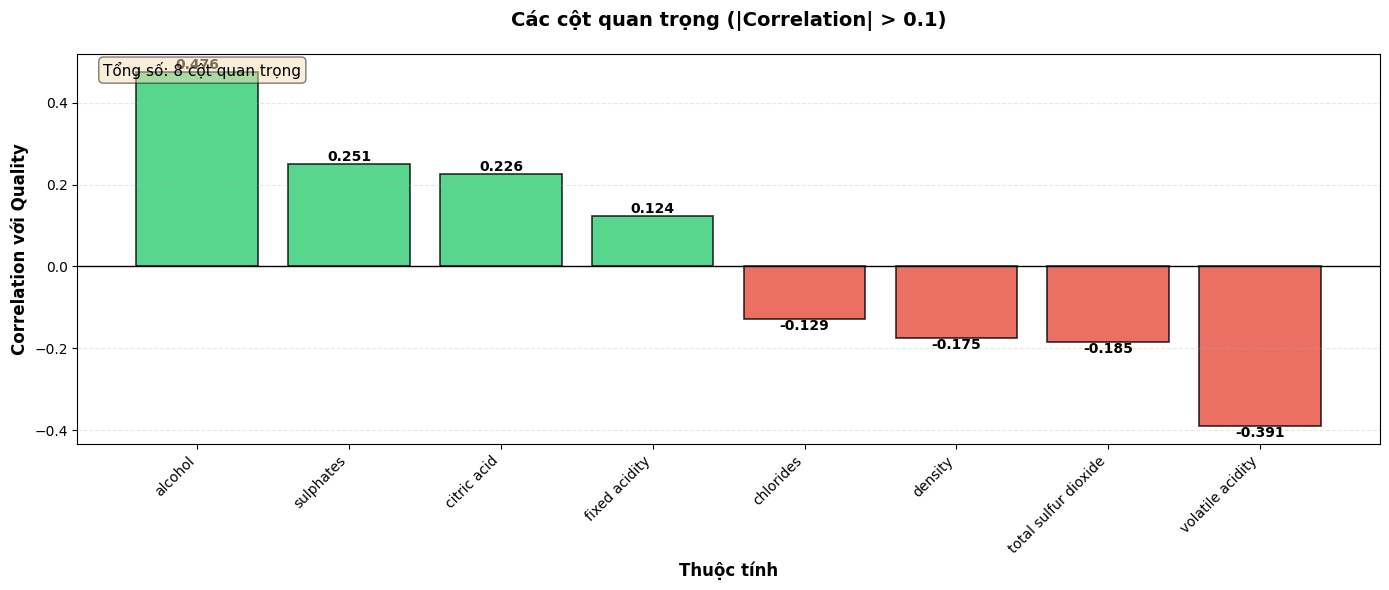

In [11]:
# Biểu đồ cột đứng - So sánh các cột quan trọng
plt.figure(figsize=(14, 6))

# Tạo màu sắc: xanh dương cho tích cực, đỏ cam cho tiêu cực
colors_important = ['#2ecc71' if x > 0 else '#e74c3c' for x in important_features.values]

# Vẽ biểu đồ cột đứng
bars = plt.bar(range(len(important_features)), important_features.values, color=colors_important, alpha=0.8, edgecolor='black', linewidth=1.2)

# Thiết lập nhãn
plt.xlabel('Thuộc tính', fontsize=12, fontweight='bold')
plt.ylabel('Correlation với Quality', fontsize=12, fontweight='bold')
plt.title('Các cột quan trọng (|Correlation| > 0.1)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(important_features)), important_features.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Thêm giá trị lên đầu mỗi cột
for i, (idx, val) in enumerate(important_features.items()):
    plt.text(i, val, f'{val:.3f}', ha='center', va='bottom' if val > 0 else 'top', fontsize=10, fontweight='bold')

# Thêm chú thích
plt.text(0.02, 0.98, f'Tổng số: {len(important_features)} cột quan trọng', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

**Kết luận:**

Sau khi lọc và phân tích các cột quan trọng với ngưỡng |correlation| > 0.1, ta có những kết luận sau:

1. **Tổng số cột quan trọng:** 8/11 cột (72.7%)
   - **4 cột ảnh hưởng tích cực:** alcohol, sulphates, citric acid, fixed acidity
   - **4 cột ảnh hưởng tiêu cực:** volatile acidity, total sulfur dioxide, density, chlorides

2. **Phân bố cân bằng:** 50% - 50%
   - Số lượng thuộc tính có ảnh hưởng tích cực và tiêu cực là bằng nhau
   - Cho thấy chất lượng rượu vang phụ thuộc vào sự cân bằng giữa các yếu tố

3. **Độ mạnh ảnh hưởng:**
   - **Mạnh nhất (|corr| > 0.35):** alcohol (0.476), volatile acidity (-0.391)
   - **Trung bình (0.15 < |corr| < 0.35):** sulphates (0.251), citric acid (0.226), total sulfur dioxide (-0.185), density (-0.175)
   - **Yếu (0.1 < |corr| < 0.15):** fixed acidity (0.124), chlorides (-0.129)

4. **3 cột không quan trọng (|corr| < 0.1):**
   - residual sugar (0.014): lượng đường dư hầu như không ảnh hưởng
   - free sulfur dioxide (-0.051): lưu huỳnh dioxide tự do ít tác động
   - pH (-0.058): độ pH có ảnh hưởng rất nhỏ

**→ Kết luận:** Khi xây dựng mô hình dự đoán chất lượng rượu vang, nên tập trung vào 8 cột quan trọng này thay vì sử dụng toàn bộ 11 cột. Điều này giúp giảm độ phức tạp của mô hình mà vẫn giữ được độ chính xác cao.

### **Lấy các cột cần thiết**

In [12]:
# Lấy các cột cần thiết
important_cols = important_features.index.tolist() + ['quality']
wine_data = wine_data[important_cols]

- Ý nghĩa của từng cột quan trọng 

| Tên cột                | Ý nghĩa                                                                                 |
|------------------------|----------------------------------------------------------------------------------------|
| **alcohol**            | Nồng độ cồn (% vol). Nồng độ cồn cao thường làm tăng chất lượng cảm nhận của rượu vang. |
| **volatile acidity**   | Độ acid bay hơi (g axit axetic/dm³). Giá trị cao gây mùi giấm, làm giảm chất lượng.     |
| **sulphates**          | Hàm lượng sulphates (g/dm³). Ảnh hưởng đến vị chát và khả năng bảo quản rượu.           |
| **citric acid**        | Hàm lượng axit citric (g/dm³). Tạo vị chua dễ chịu, giúp tăng chất lượng rượu.         |
| **total sulfur dioxide**| Tổng lượng SO₂ (mg/dm³). Bảo quản rượu, nhưng quá nhiều làm giảm chất lượng cảm nhận.  |
| **density**            | Tỷ trọng (g/cm³). Tỷ trọng cao thường liên quan đến rượu ngọt, có thể giảm chất lượng.  |
| **fixed acidity**      | Hàm lượng axit cố định (g/dm³). Tạo vị chua nền, ảnh hưởng đến cấu trúc rượu.           |
| **chlorides**          | Hàm lượng muối (g/dm³). Nồng độ cao gây vị mặn, ảnh hưởng tiêu cực đến chất lượng.       |
| **quality**            | Điểm chất lượng rượu vang (0-10), do chuyên gia đánh giá.                              |

- **Xem thông tin sơ bộ**

In [13]:
# Xem trước 5 dòng dữ liệu
wine_data.head()

,alcohol,sulphates,citric acid,fixed acidity,chlorides,density,total sulfur dioxide,volatile acidity,quality
0,9.4,0.56,0.00,7.4,0.076,0.9978,34.0,0.70,5
1,9.8,0.68,0.00,7.8,0.098,0.9968,67.0,0.88,5
2,9.8,0.65,0.04,7.8,0.092,0.9970,54.0,0.76,5
3,9.8,0.58,0.56,11.2,0.075,0.9980,60.0,0.28,6
4,9.4,0.56,0.00,7.4,0.076,0.9978,34.0,0.70,5


In [14]:
# Xem kiểu dữ liệu của các cột
wine_data.dtypes

alcohol                 float64
sulphates               float64
citric acid             float64
fixed acidity           float64
chlorides               float64
density                 float64
total sulfur dioxide    float64
volatile acidity        float64
quality                   int64
dtype: object

In [15]:
# Xem kích thước dữ liệu
wine_data.shape

(1599, 9)

## **Làm sạch dữ liệu**

### **Loại bỏ dữ liệu trùng lặp**

In [16]:
# Xem các dòng trùng lặp
wine_data[wine_data.duplicated(keep=False)]

,alcohol,sulphates,citric acid,fixed acidity,chlorides,density,total sulfur dioxide,volatile acidity,quality
0,9.4,0.56,0.00,7.4,0.076,0.99780,34.0,0.700,5
4,9.4,0.56,0.00,7.4,0.076,0.99780,34.0,0.700,5
9,10.5,0.80,0.36,7.5,0.071,0.99780,102.0,0.500,5
11,10.5,0.80,0.36,7.5,0.071,0.99780,102.0,0.500,5
22,9.5,0.91,0.21,7.9,0.106,0.99660,37.0,0.430,5
...,...,...,...,...,...,...,...,...,...
1567,10.1,0.54,0.13,7.2,0.076,0.99546,20.0,0.695,5
1579,11.3,0.60,0.09,6.2,0.053,0.99402,32.0,0.560,5
1581,11.3,0.60,0.09,6.2,0.053,0.99402,32.0,0.560,5
1592,11.0,0.75,0.13,6.3,0.076,0.99574,40.0,0.510,6


In [17]:
# Xóa dữ liệu trùng lặp
wine_data.drop_duplicates(inplace=True)

### **Thay thế dữ liệu và thay đổi định dạng của dữ liệu winequality** 

In [18]:
# Xem trước 5 dòng dữ liệu cho wine_data
wine_data.head(5)

,alcohol,sulphates,citric acid,fixed acidity,chlorides,density,total sulfur dioxide,volatile acidity,quality
0,9.4,0.56,0.00,7.4,0.076,0.9978,34.0,0.70,5
1,9.8,0.68,0.00,7.8,0.098,0.9968,67.0,0.88,5
2,9.8,0.65,0.04,7.8,0.092,0.9970,54.0,0.76,5
3,9.8,0.58,0.56,11.2,0.075,0.9980,60.0,0.28,6
5,9.4,0.56,0.00,7.4,0.075,0.9978,40.0,0.66,5


In [19]:
# Xem kiểu dữ liệu
wine_data.dtypes

alcohol                 float64
sulphates               float64
citric acid             float64
fixed acidity           float64
chlorides               float64
density                 float64
total sulfur dioxide    float64
volatile acidity        float64
quality                   int64
dtype: object

In [20]:
# Chuyển cột 'total sulfur dioxide' từ float sang int
wine_data['total sulfur dioxide'] = wine_data['total sulfur dioxide'].astype(int)

In [21]:
# Xem kiểu dữ liệu
wine_data.dtypes

alcohol                 float64
sulphates               float64
citric acid             float64
fixed acidity           float64
chlorides               float64
density                 float64
total sulfur dioxide      int64
volatile acidity        float64
quality                   int64
dtype: object

### **Xử lý dữ liệu bị thiếu**

In [22]:
# Phân tích số lượng giá trị NaN trong từng cột (trừ quality)
nan_counts = wine_data.drop(columns=['quality']).isnull().sum()
print("Số lượng giá trị NaN trong từng cột (trừ quality):")
print(nan_counts)

Số lượng giá trị NaN trong từng cột (trừ quality):
alcohol                 0
sulphates               0
citric acid             0
fixed acidity           0
chlorides               0
density                 0
total sulfur dioxide    0
volatile acidity        0
dtype: int64


**Kết luận**: Sau khi kiểm tra số lượng giá trị NaN trong từng cột của dữ liệu winequality:  
- Tất cả các cột đều không có giá trị NaN (không có dữ liệu bị thiếu).
- Dữ liệu đầy đủ, không cần thực hiện thao tác thay thế hoặc loại bỏ giá trị thiếu.

### **Xử lý giá trị bằng 0**

In [23]:
# Phân tích số lượng giá trị 0 trong từng cột (trừ quality)
zero_counts = (wine_data.drop(columns=['quality']) == 0).sum()
print("\nSố lượng giá trị 0 trong từng cột (trừ quality):")
print(zero_counts)


Số lượng giá trị 0 trong từng cột (trừ quality):
alcohol                   0
sulphates                 0
citric acid             118
fixed acidity             0
chlorides                 0
density                   0
total sulfur dioxide      0
volatile acidity          0
dtype: int64


In [24]:
# Thay thế giá trị 0 trong cột 'citric acid' bằng giá trị trung vị
median_citric_acid = wine_data['citric acid'].median()
wine_data['citric acid'] = wine_data['citric acid'].replace(0, median_citric_acid)


In [25]:
# Phân tích số lượng giá trị 0 trong từng cột (trừ quality)
zero_counts = (wine_data.drop(columns=['quality']) == 0).sum()
print("\nSố lượng giá trị 0 trong từng cột (trừ quality):")
print(zero_counts)


Số lượng giá trị 0 trong từng cột (trừ quality):
alcohol                 0
sulphates               0
citric acid             0
fixed acidity           0
chlorides               0
density                 0
total sulfur dioxide    0
volatile acidity        0
dtype: int64


### **Xử lý các giá trị ngoại lai**

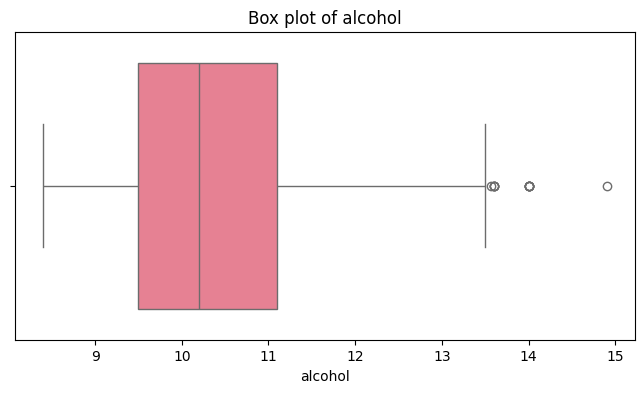

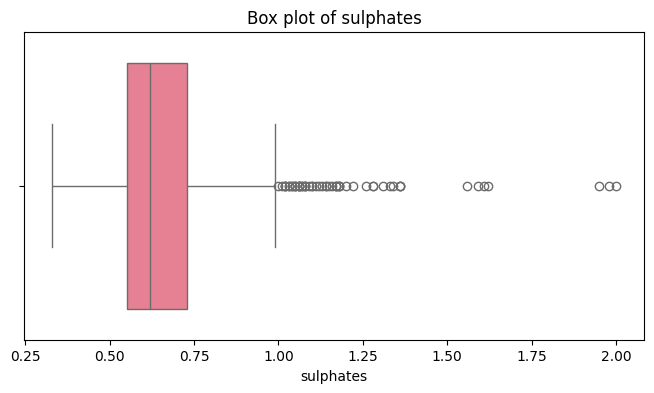

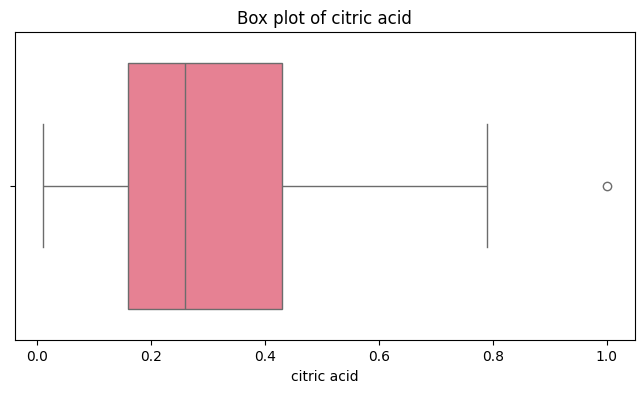

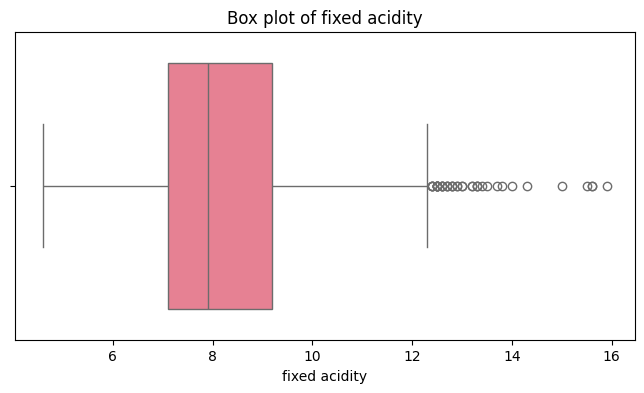

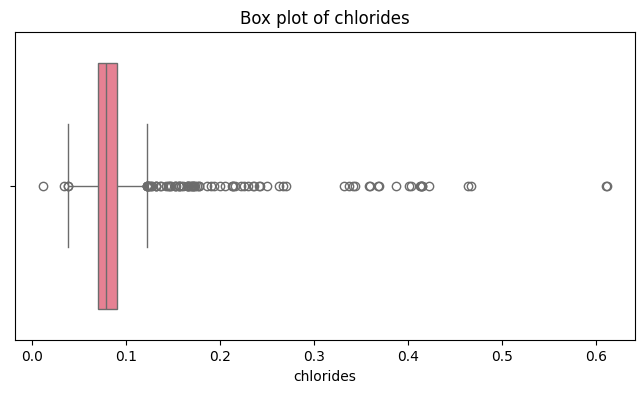

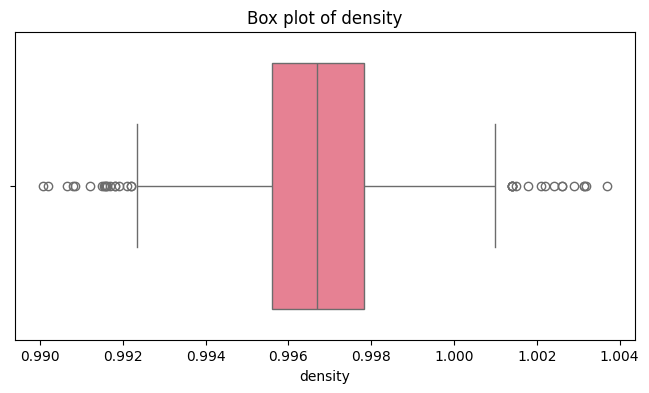

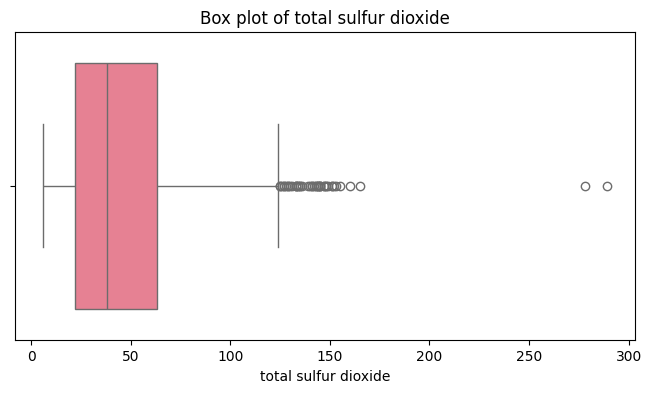

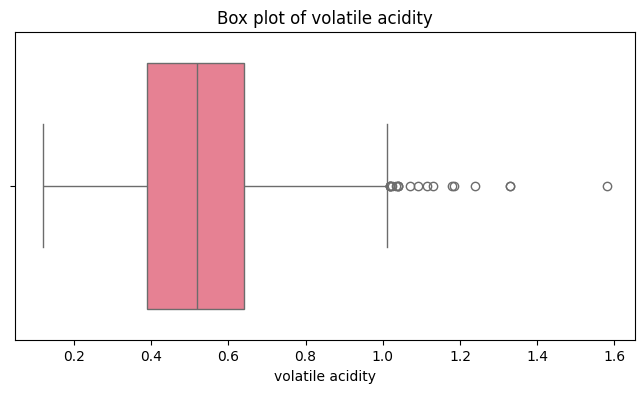

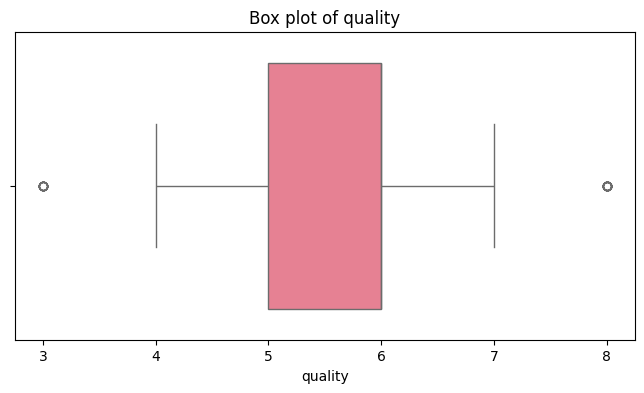

In [26]:
# Kiểm tra các giá trị bất thường trong tất cả các cột bằng biểu đồ hộp (box plot)
for column in wine_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=wine_data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

**Các cột cần xử lý giá trị ngoại lai**  


**1. chlorides (Hàm lượng muối):**
- Giá trị ngoại lai thường do lỗi nhập liệu hoặc đo lường sai, vì hàm lượng muối trong rượu vang thường nằm trong một khoảng hẹp.
- Giá trị quá cao có thể gây vị mặn bất thường, không phù hợp với tiêu chuẩn rượu vang.
- **Nên xử lý ngoại lai** để đảm bảo dữ liệu phản ánh đúng thực tế sản xuất.

**2. total sulfur dioxide (Tổng lượng SO₂):**
- SO₂ dùng để bảo quản rượu, nhưng giá trị quá cao hoặc quá thấp thường là do lỗi kỹ thuật hoặc nhập liệu.
- Giá trị ngoại lai có thể làm sai lệch phân tích về ảnh hưởng của SO₂ đến chất lượng rượu.
- **Nên xử lý ngoại lai** để tránh ảnh hưởng tiêu cực đến mô hình và phân tích.

**3. density (Tỷ trọng):**
- Tỷ trọng rượu vang thường ổn định, giá trị ngoại lai có thể do lỗi đo lường hoặc nhập sai đơn vị.
- Giá trị quá cao/thấp không phản ánh đúng bản chất sản phẩm.
- **Nên xử lý ngoại lai** để dữ liệu chính xác hơn.

**Các cột còn lại (alcohol, volatile acidity, sulphates, citric acid, fixed acidity, quality)**
- Giá trị ngoại lai có thể là đặc trưng tự nhiên của sản phẩm hoặc phản ánh sự đa dạng thực tế.

---

**Hàm xử lý giá trị ngoại lai bằng phương pháp IQR**

- Phương pháp IQR (Interquartile Range) dùng để phát hiện và xử lý các giá trị ngoại lai (outlier) trong dữ liệu.
- IQR là khoảng giữa tứ phân vị thứ 1 (Q1 - 25%) và tứ phân vị thứ 3 (Q3 - 75%) của dữ liệu.
- Các giá trị nằm ngoài khoảng `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` được coi là ngoại lai.
- Hàm này sẽ thay thế các giá trị nhỏ hơn `Q1 - 1.5*IQR` bằng giá trị biên dưới, và các giá trị lớn hơn `Q3 + 1.5*IQR` bằng giá trị biên trên.

**Công thức:**
- Q1 = Phân vị thứ 1 (25%)
- Q3 = Phân vị thứ 3 (75%)
- IQR = Q3 - Q1
- Biên dưới: `lower_bound = Q1 - 1.5 * IQR`
- Biên trên: `upper_bound = Q3 + 1.5 * IQR`
- Nếu giá trị < `lower_bound` → thay bằng `lower_bound`
- Nếu giá trị > `upper_bound` → thay bằng `upper_bound`

In [27]:
# Hàm xử lý các giá trị ngoại lai bằng phương pháp IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [28]:
# Áp dụng hàm xử lý ngoại lai cho các cột: 'chlorides', 'total sulfur dioxide', 'density'
for col in ['chlorides', 'total sulfur dioxide', 'density']:
    handle_outliers_iqr(wine_data, col)

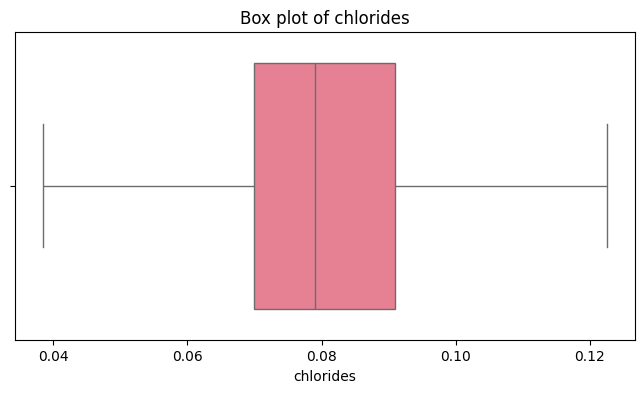

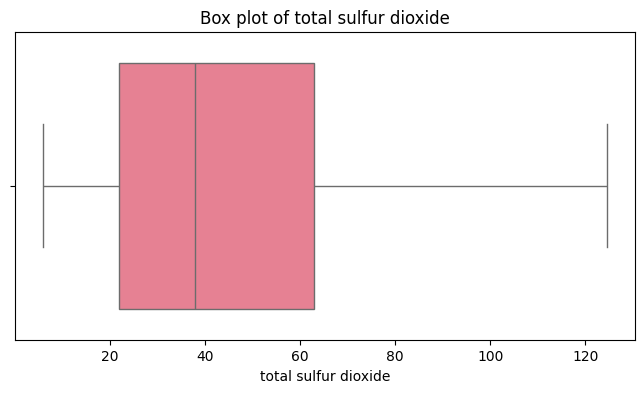

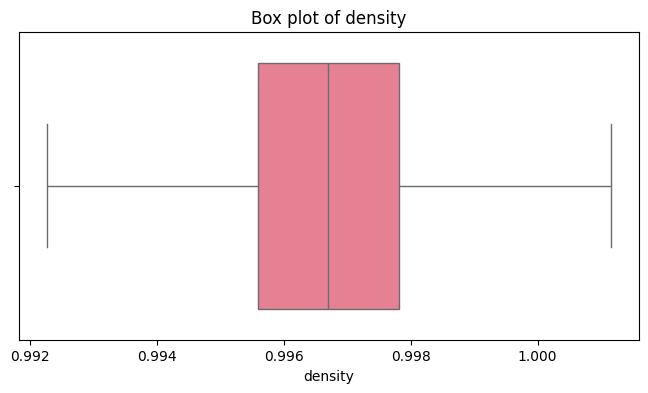

In [29]:
# Xem lại các giá trị bất thường trong các cột 'chlorides', 'total sulfur dioxide', 'density'
for column in ['chlorides', 'total sulfur dioxide', 'density']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=wine_data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# **TRỰC QUAN HOÁ DỮ LIỆU**

## **Trực quan hoá dữ liệu đơn biến**

### **Biểu đồ tần suất của các thuộc tính trong tập dữ liệu**

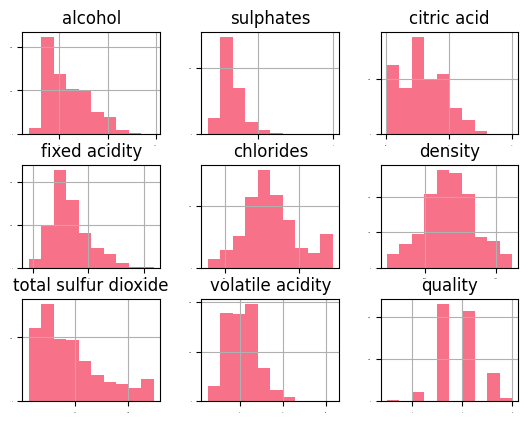

In [30]:
# Vẽ biểu đồ histogram cho mỗi cột trong dataset
wine_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

**Biểu đồ tần suất (histogram) của các thuộc tính cho thấy**:  
- Alcohol, sulphates, citric acid, total sulfur dioxide và volatile acidity có phân bố lệch phải, tập trung nhiều giá trị nhỏ.  
- Fixed acidity, chlorides và density có phân bố gần chuẩn, tập trung quanh giá trị trung bình.  
- Quality có phân bố rời rạc, thể hiện qua các mức chất lượng cụ thể.  

### **Biểu đồ mật độ của các thuộc tính trong tập dữ liệu**

Biểu đố mật độ (Density) nhầm làm trơn các đường biên của biểu đồ Histogram. Từ đó có cái nhìn rõ hơn về hình dạng phân bố của biểu đồ

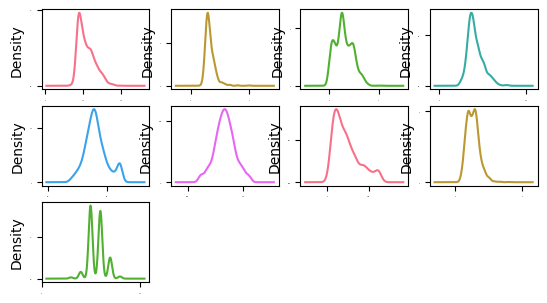

In [31]:
# Vẽ biểu đồ mật độ (density) cho mỗi cột trong dataset
wine_data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
plt.show()

**Biểu đồ mật độ (density) cho thấy**:  
- Các thuộc tính như fixed acidity, volatile acidity, citric acid, chlorides và sulphates đều có phân bố lệch phải.    
- Các thuộc tính alcohol và quality thể hiện phân bố tập trung, trong đó quality có các đỉnh rời rạc do là biến rời.  
- Một số thuộc tính như density và total sulfur dioxide có đường mật độ hẹp, cho thấy mức độ biến thiên thấp.
- Một số thuộc tính như density và total sulfur dioxide có đường mật độ hẹp, cho thấy mức độ biến thiên thấp.     
Ngoài ra, sự xuất hiện của đa đỉnh (multimodal) trong một vài thuộc tính gợi ý rằng dữ liệu có thể bao gồm nhiều nhóm mẫu rượu khác nhau.  

### **Biểu đồ Boxplot của các thuộc tính trong tập dữ liệu**

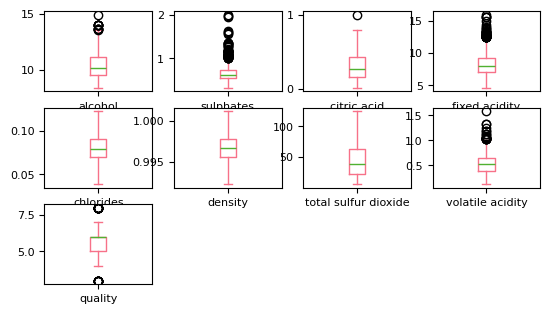

In [32]:
# Vẽ biểu đồ hộp (box plot) cho mỗi cột trong dataset
wine_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8)
plt.show()

**Biểu đồ Boxplot cho thấy**:
- Các biến như fixed acidity, volatile acidity, citric acid và sulphates đều có phân bố lệch phải, phù hợp với nhận định từ Histogram và Density Plot.
- Một số thuộc tính như alcohol, density và total sulfur dioxide có phạm vi biến thiên hẹp, cho thấy dữ liệu khá ổn định.
- Ngược lại, chlorides và volatile acidity xuất hiện nhiều điểm ngoại lai (outliers) nằm ngoài râu của hộp, điều này phản ánh sự chênh lệch đáng kể giữa các mẫu rượu.

## **TRỰC QUAN HOÁ DỮ LIỆU ĐA BIẾN**

### **Biểu đồ ma trận tán xạ (Scatter Plot Matrix)**

Biểu đồ ma trận tán xạ cho phép quan sát mối quan hệ giữa các cặp thuộc tính trong tập dữ liệu rượu vang đỏ.    
Mỗi ô trong ma trận thể hiện phân bố của hai biến, trong đó trục hoành và trục tung đại diện cho hai thuộc tính tương ứng.

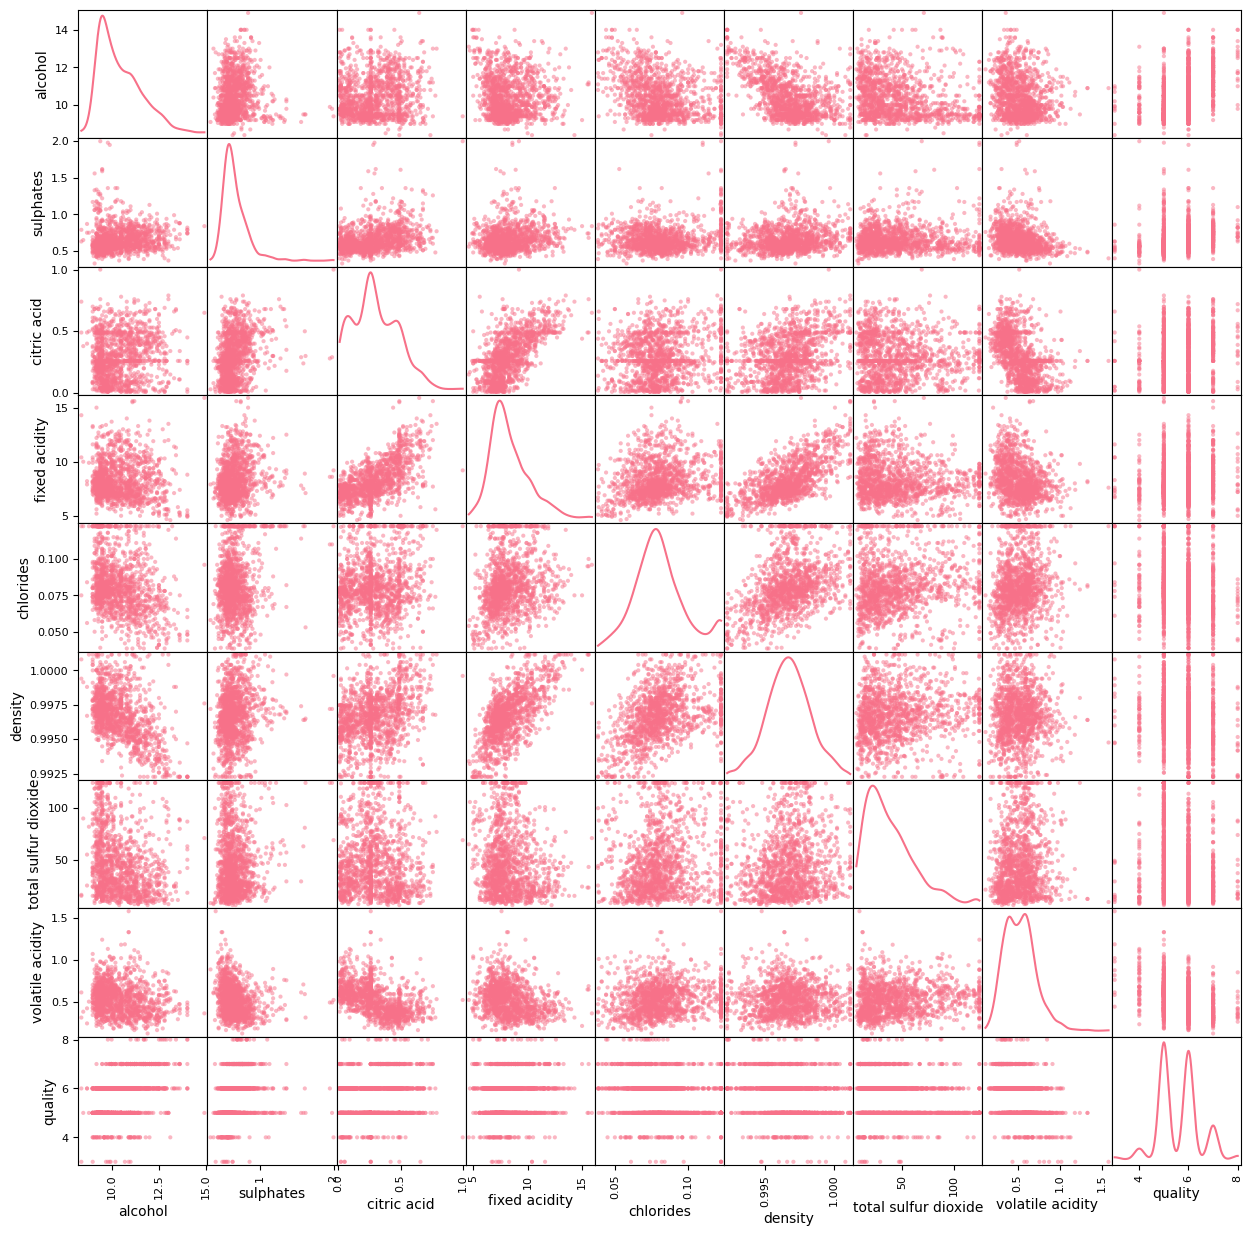

In [33]:
# scatter plot matrix
pd.plotting.scatter_matrix(wine_data, figsize=(15, 15), diagonal='kde')
plt.show()

**Từ biểu đồ, ta nhận thấy**:  
- Thuộc tính alcohol có xu hướng tương quan nghịch với density và total sulfur dioxide, tức là khi độ cồn tăng thì mật độ và hàm lượng SO₂ giảm.  
- Giữa citric acid và fixed acidity tồn tại mối tương quan thuận nhẹ, phản ánh rằng rượu có độ axit cao thường đi kèm với hàm lượng acid citric lớn.  
- Ngược lại, volatile acidity có mối tương quan nghịch với quality, cho thấy nồng độ acid bay hơi cao thường làm giảm chất lượng rượu.  
- Các biến còn lại như chlorides và sulphates có xu hướng phân bố rải rác, thể hiện mối quan hệ yếu hoặc phi tuyến với các biến khác.  

### **Ma trận tương quan (Correlation Matrix)**

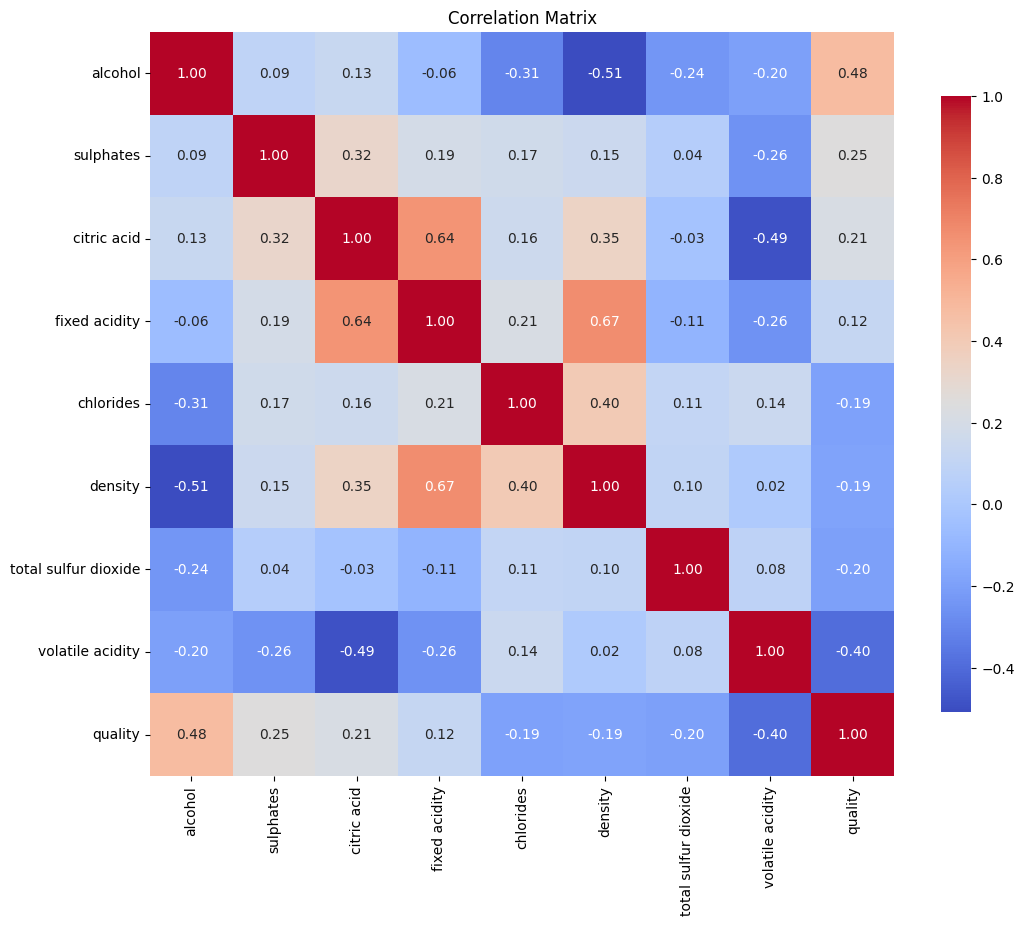

In [34]:
# correlation matrix
corr_matrix = wine_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

**Biểu đồ ma trận tương quan cho thấy**:   
- Alcohol có tương quan dương mạnh nhất với quality (r = 0.48), trong khi volatile acidity có tương quan âm khá rõ (r = -0.40). 
- Ngoài ra, các cặp fixed acidity – density và fixed acidity – citric acid có tương quan cao, phản ánh mối liên hệ giữa độ axit và độ đặc của rượu. 
- Nhìn chung, chất lượng rượu đỏ chịu ảnh hưởng chính từ nồng độ cồn, độ axit bay hơi và một phần nhỏ từ sulphates.

## **Tóm tắt ý tưởng**

- Sau khi làm sạch dữ liệu, các biểu đồ trực quan được sử dụng để hiểu rõ đặc điểm và mối quan hệ giữa các thuộc tính.  
- Kết quả cho thấy phần lớn các biến như alcohol, sulphates, citric acid có phân bố lệch phải, trong khi fixed acidity và density gần chuẩn. Biểu đồ hộp chỉ ra sự tồn tại của một số giá trị ngoại lai nhưng không ảnh hưởng nhiều đến tổng thể.  
- Ma trận tán xạ và biểu đồ tương quan cho thấy alcohol có tương quan dương mạnh với quality, còn volatile acidity tương quan âm, chứng tỏ nồng độ cồn cao và độ axit bay hơi thấp góp phần nâng cao chất lượng rượu.  
- Nhìn chung, việc trực quan hóa đã giúp nhận diện được các đặc điểm nổi bật và mối liên hệ quan trọng giữa các yếu tố, làm cơ sở cho bước xây dựng mô hình dự đoán chất lượng rượu sau này.  